In [8]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: 1 if item in x else 0)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [10]:
# Reading NA data
X_df = pd.read_csv('../new_data/Persian/persian_dataset.csv', index_col=None)
Y_df = pd.read_csv('../new_data/Persian/p_labels_cleaned.csv', usecols=['filename', 'emotions'], index_col='filename')
# Reading Persian data
# X_df_p = pd.read_csv('../new_data/Persian/persian_dataset.csv', index_col=None)
# Y_df_p = pd.read_csv('../new_data/Persian/p_labels_cleaned.csv', usecols=['filename', 'emotions'], index_col='filename')

# concatenate them
# Y_df = pd.concat([Y_df_na, Y_df_p], sort=False)
# X_df = pd.concat([X_df_na, X_df_p], ignore_index=True, sort=False)

In [11]:
# Remove videos that we deleted from labels.
X_df = X_df[X_df['filename'].isin(Y_df.index)]
# Reset index to prevent future errors in using iloc
X_df.reset_index(inplace=True, drop=True)
# Change emotion column to list type
Y_df["emotions"] = Y_df["emotions"].apply(eval)

label_cols = to_1D(Y_df["emotions"]).unique() 
labels_expanded = boolean_df(Y_df['emotions'], label_cols )

In [12]:
labels = labels_expanded.columns
au_cols = ['AU01_r','AU02_r','AU04_r','AU05_r','AU06_r','AU07_r','AU09_r','AU10_r','AU12_r','AU14_r','AU15_r','AU17_r','AU20_r','AU23_r','AU25_r','AU26_r','AU45_r']

In [13]:
means = []
for emotion in labels:
    # find videos with emotion = 1
    emotion_videos = labels_expanded[labels_expanded[emotion] == 1].index.to_list()
    # select AU columns for all videos labelled with that emotion
    au = X_df[X_df['filename'].isin(emotion_videos)][au_cols + ['filename']]
    # find peak of AUs in each video
    max_au = au.groupby('filename')[au_cols].max()
    # calculate mean of peaks and add it to chart data
    means.append(max_au.mean().values)

In [14]:
means

[array([1.19555556, 1.75111111, 0.14888889, 0.87      , 0.95888889,
        1.63444444, 0.68444444, 1.31888889, 1.83888889, 1.48333333,
        0.91333333, 0.58777778, 1.17333333, 0.21333333, 2.36333333,
        1.52888889, 1.61555556]),
 array([1.84307692, 1.12153846, 1.68615385, 2.24692308, 1.68384615,
        2.31      , 1.46923077, 2.27230769, 1.49230769, 1.78230769,
        2.12692308, 1.71692308, 1.69      , 1.64769231, 3.12769231,
        2.29615385, 0.75307692]),
 array([2.17913043, 1.92782609, 1.30434783, 2.59304348, 1.34826087,
        2.15869565, 1.09347826, 2.13608696, 1.5726087 , 1.74565217,
        1.51521739, 1.12434783, 1.94565217, 0.75521739, 3.52347826,
        2.39652174, 1.38434783]),
 array([1.5056, 2.32  , 0.9028, 1.5888, 1.5312, 2.374 , 1.2812, 1.7204,
        2.0472, 1.5496, 1.2524, 0.9664, 1.3532, 0.7148, 3.2524, 2.6424,
        3.4184]),
 array([1.55117647, 2.40117647, 0.68529412, 1.53058824, 1.34117647,
        1.80647059, 0.89764706, 1.66      , 1.95529412, 

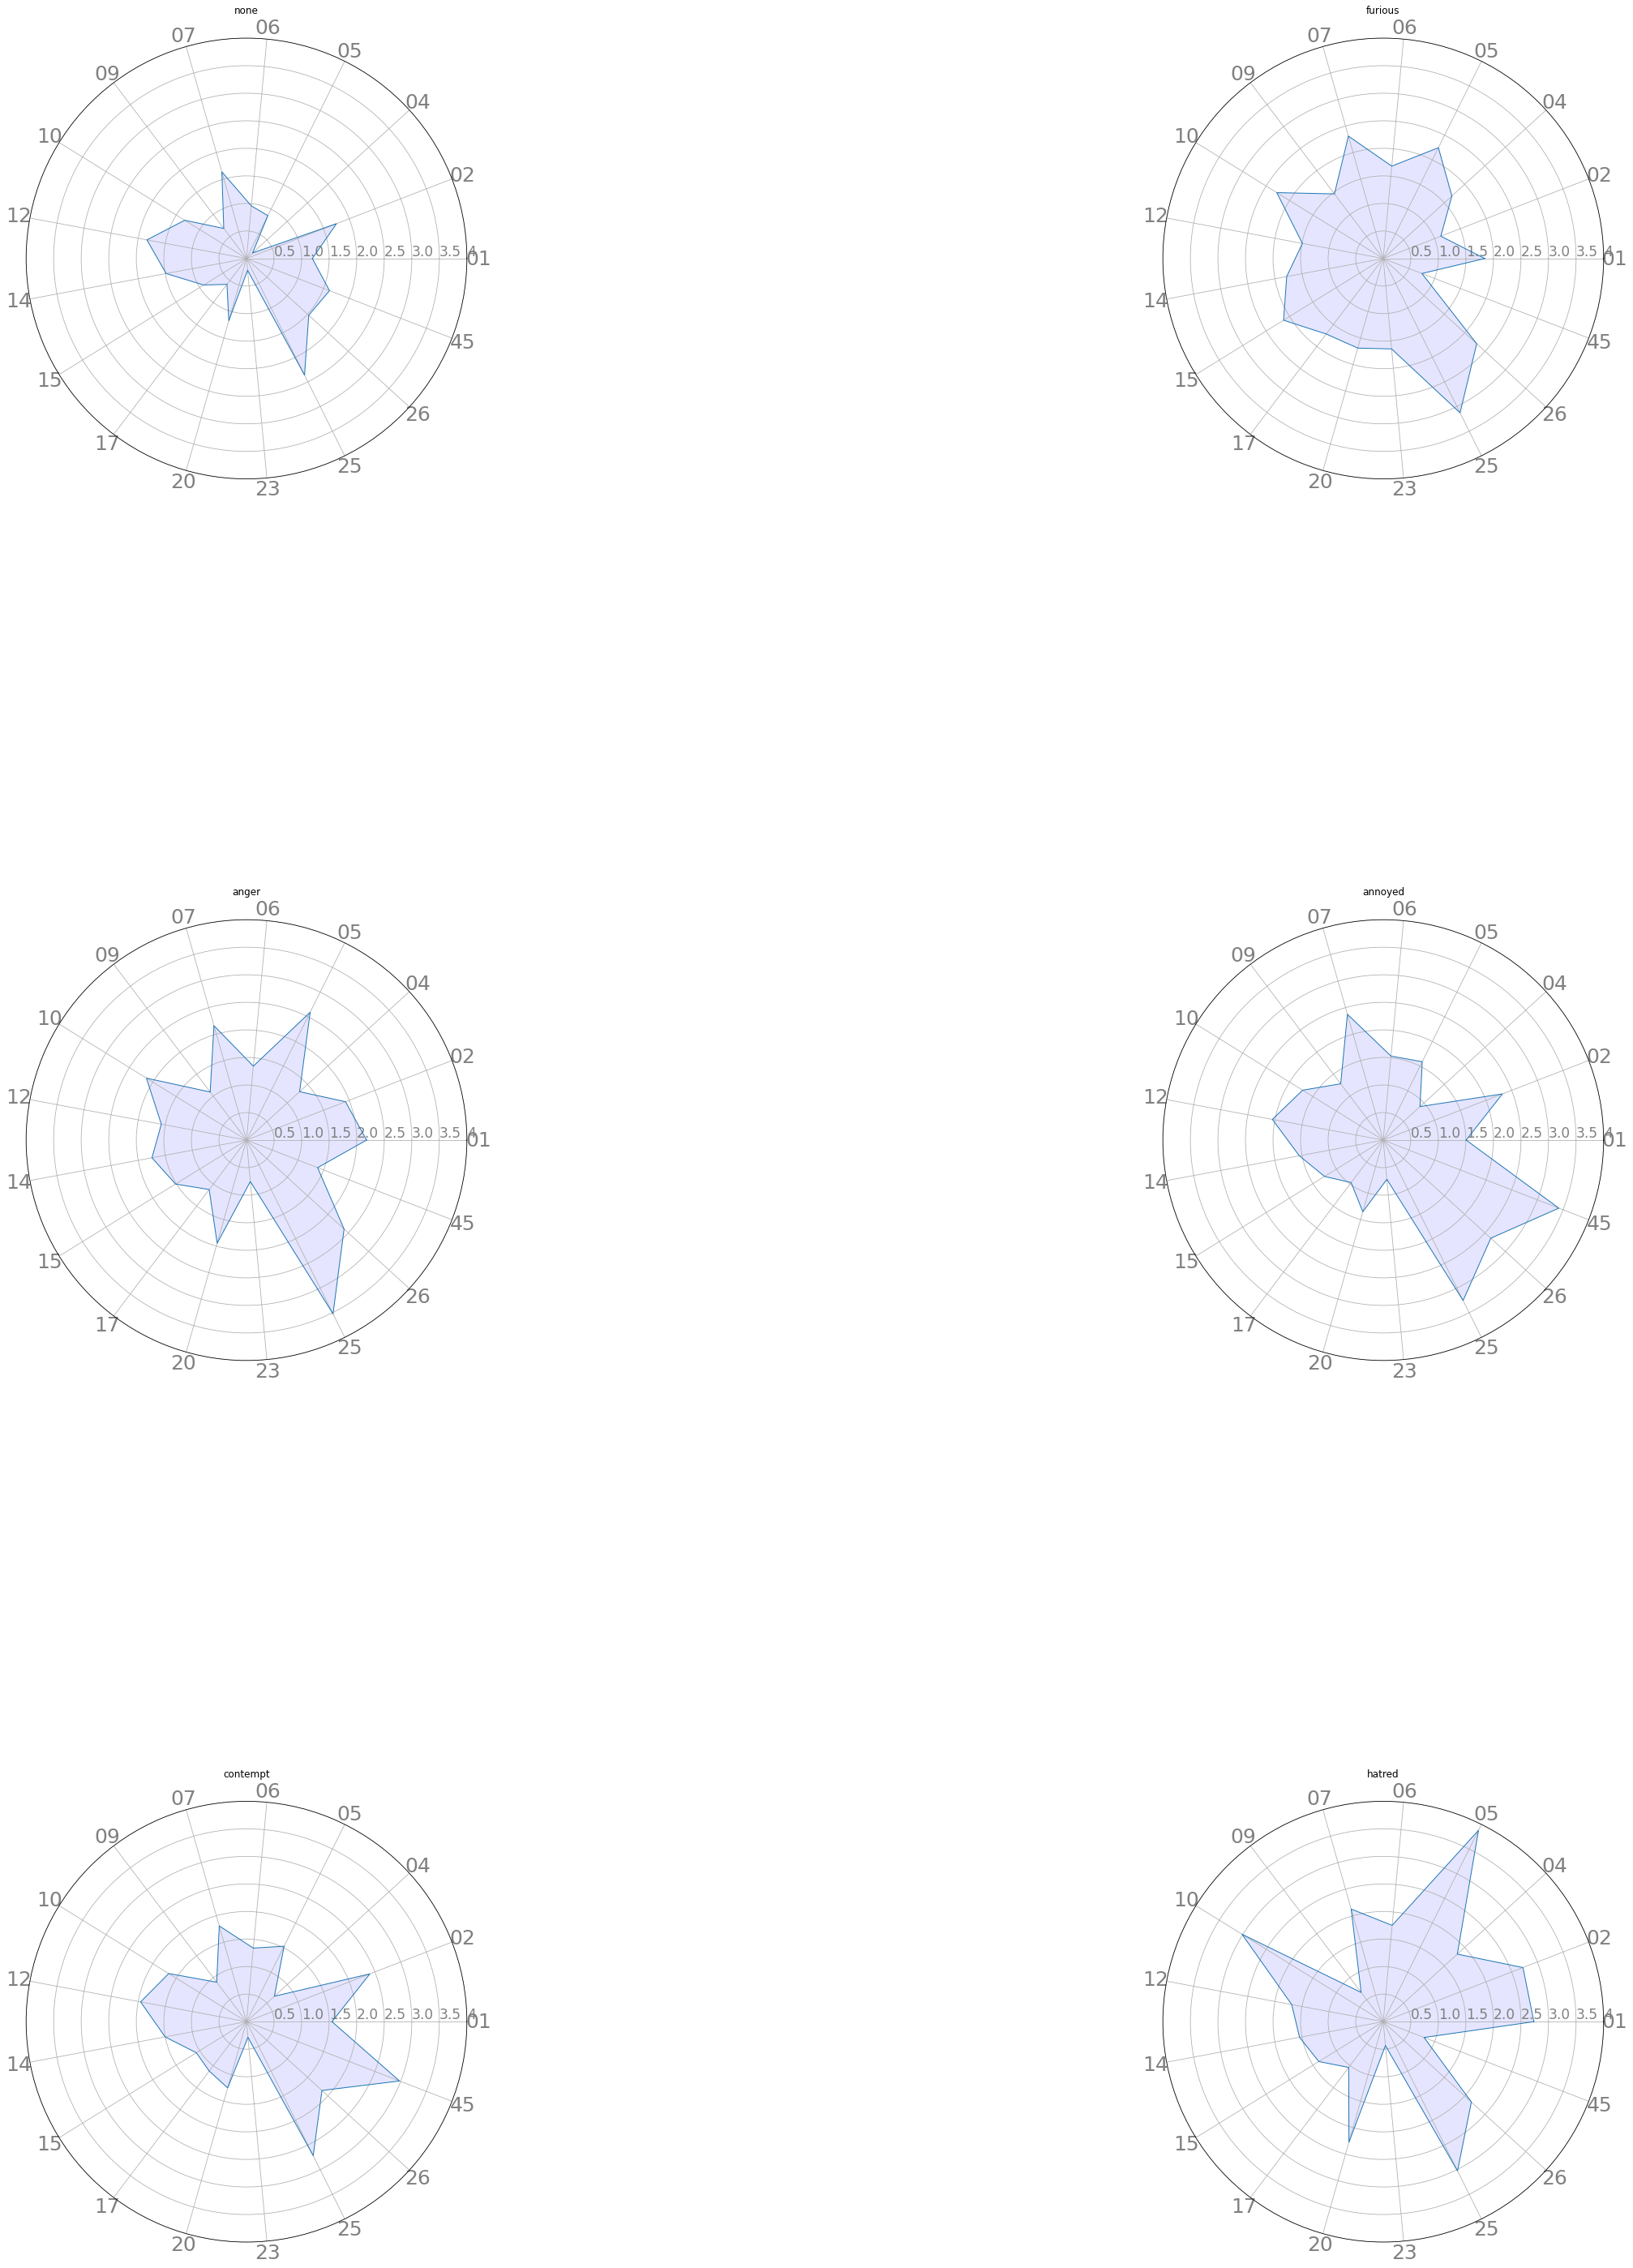

In [18]:
from math import pi
df = pd.DataFrame(columns=au_cols, data=means)
au_labels = ['01','02','04','05','06','07','09','10','12','14','15','17','20','23','25','26','45']
 
# number of variable
# list(df) returns col headers
categories=list(df)
N = len(categories)

fig, axs = plt.subplots(3, 2, figsize=(50, 50), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.01)

axs = axs.ravel()
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
for i in range(len(means)):
    values=df.iloc[i]
    # print(values)
    values = values.values.flatten().tolist()
    # print(values)
    values += values[:1]
    # print('%%%%%%%%%%%%%%           ', values, len(values))

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    axs[i] = plt.subplot(321 + i, polar=True)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], au_labels, color='grey', size=25)
    
    # Draw ylabels
    axs[i].set_rlabel_position(0)
    plt.yticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], ['0.5', "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4"], color="grey", size=17)
    plt.ylim(0,4.0)
    
    # Plot data
    axs[i].plot(angles, values, linewidth=1, linestyle='solid')
    
    axs[i].set_title(labels[i])
    # Fill area
    axs[i].fill(angles, values, 'b', alpha=0.1)